# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Volume renderings in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [1]:
from lightning import Lightning

from colorsys import hsv_to_rgb
from numpy import ndarray, linspace

## Connect to server


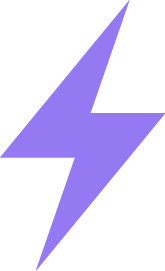

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> Color cubes

Volume rendering lets you render a sequence of images as a 3D volume.
<br>
Lightining currently assumes isotropic images, so the sampling in x,y, and z should be comparable.
<br>
Visualizing color spaces is a fun way to explore volume rendering. We'll generate RGB and HSV cubes.

In [3]:
nx, ny, nz = (50, 50, 50)
rgb = ndarray((nx,ny,nz,3))
hsv = ndarray((nx,ny,nz,3))
for i, ii in enumerate(linspace(0,1,nx)):
    for j, jj in enumerate(linspace(0,1,ny)):
        for k, kk in enumerate(linspace(0,1,nz)):
            position = (i, j, k)
            rgb[position] = (kk, jj, ii)
            hsv[position] = hsv_to_rgb(jj, ii, kk)

Render RGB cube

In [4]:
lgn.volume([x for x in rgb])

Render HSV cube

In [5]:
lgn.volume([x for x in hsv])